Paired TAM (transcient abnormal myleoproliferation) vs AML (acute myeloid leukemia) analysis of patients with the co-occuring condition of Down Syndrome using DESeq2 on IJC counts obtained from rMATS analysis.

Using a matrix constructed from Kids First Workflow V4 done on single runs, a post-rMATS-single-run prepareSEfiles.sh was run that created a bed file for visualizaiton in UCSC Genome browser of all the events, as well as created a matrix of the single runs normalized to the non-redundant union of files.  Using associative arrays in an awk script, it was a rapid way to transform the individual counts from each of the individual runs into a matrix that facilitated analysis.

Using annotations obtained from the rMATS run that provided the coordinates of each of the splicing events as well as the gene that the junctions came from and the count of the reads that overlapped the junctions.   
 
We will use Limma to perform analysis of these junction counts in the identical way that a gene analysis would be completed.


In [1]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager", repos = "https://cloud.r-project.org")


In [2]:
setwd("../data/")


In [3]:
getwd()


[1] "/Users/annedeslattesmays/Desktop/projects/rmats-ijc-analysis/data"

In [4]:
cts <- as.matrix(read.csv("SE.IJC.paired.TAM.AML.csv",sep=",",row.names="ID"))

In [5]:
featureData <- data.frame(read.csv("SE.coordinates.matrix.csv", sep=",",row.names="ID"))

In [6]:
head(featureData,2)

,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSG00000117620.15,SLC35A3,chr1,+,100007033,100007156,99993536,99993741,100009287,100009323
2,ENSG00000117620.15,SLC35A3,chr1,+,100007033,100007156,99993536,99993741,100011364,100011533


In [7]:
featureData <- featureData[,c(1,2)]

In [8]:
head(featureData,2)

,GeneID,geneSymbol
,<chr>,<chr>
1,ENSG00000117620.15,SLC35A3
2,ENSG00000117620.15,SLC35A3


In [9]:
dim(cts)
head(cts,2)

[1] 106443      8

,PAUVKY.03A,PAUVKY.40A,PAWSNZ.03A,PAWSNZ.40A,PAUTLA.03A,PAUTLA.40A,PAVUDU.03A,PAVUDU.40A
1,9,15,17,0,44,17,33,19
2,22,19,9,16,26,11,26,17


In [10]:
dim(featureData)
head(featureData,2)

[1] 106443      2

,GeneID,geneSymbol
,<chr>,<chr>
1,ENSG00000117620.15,SLC35A3
2,ENSG00000117620.15,SLC35A3


In [11]:
coldata <- read.csv("design_matrix.csv",row.names=1)

In [12]:
coldata


,patient,condition
,<chr>,<chr>
PAUVKY-03A,PAUVKY,TAM
PAUVKY-40A,PAUVKY,AML
PAWSNZ-03A,PAWSNZ,TAM
PAWSNZ-40A,PAWSNZ,AML
PAUTLA-03A,PAUTLA,TAM
PAUTLA-40A,PAUTLA,AML
PAVUDU-03A,PAVUDU,TAM
PAVUDU-40A,PAVUDU,AML


In [13]:
coldata <- coldata[,c("patient","condition")]
coldata$condition <- factor(coldata$condition)
coldata$patient <- factor(coldata$patient)

In [14]:
rownames(coldata)

[1] "PAUVKY-03A" "PAUVKY-40A" "PAWSNZ-03A" "PAWSNZ-40A" "PAUTLA-03A"
[6] "PAUTLA-40A" "PAVUDU-03A" "PAVUDU-40A"

In [15]:
rownames(coldata) <-sub("-",".",rownames(coldata))

In [16]:
colnames(cts)

[1] "PAUVKY.03A" "PAUVKY.40A" "PAWSNZ.03A" "PAWSNZ.40A" "PAUTLA.03A"
[6] "PAUTLA.40A" "PAVUDU.03A" "PAVUDU.40A"

In [17]:
all(rownames(coldata) %in% colnames(cts))



[1] TRUE

In [18]:
library(Glimma)

In [19]:
BiocManager::install("dplyr")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.17 (BiocManager 1.30.21.1), R 4.3.1 (2023-06-16)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'dplyr'”
Old packages: 'BiocManager', 'bslib', 'cpp11', 'DelayedArray', 'gert',
  'htmltools', 'MatrixGenerics', 'nlme', 'promises', 'purrr', 'RcppArmadillo',
  'shiny', 'tinytex', 'xfun'



In [20]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [21]:
colnames(cts)

[1] "PAUVKY.03A" "PAUVKY.40A" "PAWSNZ.03A" "PAWSNZ.40A" "PAUTLA.03A"
[6] "PAUTLA.40A" "PAVUDU.03A" "PAVUDU.40A"

In [22]:
grouping_variable <- c("TAM","AML","TAM","AML","TAM","AML","TAM","AML")
grouping_variable

[1] "TAM" "AML" "TAM" "AML" "TAM" "AML" "TAM" "AML"

In [23]:
TAM_group <- cts[,grouping_variable == "TAM"]
colnames(TAM_group)
TAM_group_df <- data.frame(TAM_group)
AML_group <- cts[,grouping_variable == "AML"]
AML_group_df <- data.frame(AML_group)
colnames(AML_group)

[1] "PAUVKY.03A" "PAWSNZ.03A" "PAUTLA.03A" "PAVUDU.03A"

[1] "PAUVKY.40A" "PAWSNZ.40A" "PAUTLA.40A" "PAVUDU.40A"

In [24]:
dim(cts)
head(cts,4)

[1] 106443      8

,PAUVKY.03A,PAUVKY.40A,PAWSNZ.03A,PAWSNZ.40A,PAUTLA.03A,PAUTLA.40A,PAVUDU.03A,PAVUDU.40A
1,9,15,17,0,44,17,33,19
2,22,19,9,16,26,11,26,17
3,0,0,0,0,46,36,38,48
4,62,41,30,39,28,30,31,46


In [25]:
TAM_rowmeans <- rowMeans(TAM_group_df,na.rm=TRUE)
head(TAM_rowmeans,3)
length(TAM_rowmeans)
AML_rowmeans <- rowMeans(AML_group_df,na.rm=TRUE)
head(AML_rowmeans,3)
length(AML_rowmeans)

1     2     3 
25.75 20.75 21.00

[1] 106443

1     2     3 
12.75 15.75 21.00

[1] 106443

In [26]:
install.packages("matrixStats")
library(matrixStats)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count




In [27]:
TAM_rowsds = rowSds(as.matrix(TAM_group_df))
AML_rowsds = rowSds(as.matrix(AML_group_df))
length(TAM_rowsds)
length(AML_rowsds)

[1] 106443

[1] 106443

In [28]:
TAM_withinsds <- as.logical(abs((TAM_group[,1] - TAM_rowmeans) <= TAM_rowsds)) &
                 as.logical(abs((TAM_group[,2] - TAM_rowmeans) <= TAM_rowsds)) &
                 as.logical(abs((TAM_group[,3] - TAM_rowmeans) <= TAM_rowsds)) &
                 as.logical(abs((TAM_group[,4] - TAM_rowmeans) <= TAM_rowsds)) 
is.logical(TAM_withinsds)
length(TAM_withinsds)
dim(TAM_withinsds)
head(TAM_withinsds)
sum(TAM_withinsds == TRUE)

[1] TRUE

[1] 106443

NULL

[1] FALSE  TRUE FALSE FALSE FALSE  TRUE

[1] 37786

In [29]:
AML_withinsds <- as.logical(abs((AML_group[,1] - AML_rowmeans) <= AML_rowsds)) &
                 as.logical(abs((AML_group[,2] - AML_rowmeans) <= AML_rowsds)) &
                 as.logical(abs((AML_group[,3] - AML_rowmeans) <= AML_rowsds)) &
                 as.logical(abs((AML_group[,4] - AML_rowmeans) <= AML_rowsds))
is.logical(AML_withinsds)
length(AML_withinsds)
dim(AML_withinsds)
head(AML_withinsds)
sum(AML_withinsds == TRUE)

[1] TRUE

[1] 106443

NULL

[1]  TRUE  TRUE FALSE FALSE  TRUE FALSE

[1] 46368

In [30]:
filter_cts_logical <- AML_withinsds & TAM_withinsds
is.logical(filter_cts_logical)
length(filter_cts_logical)
dim(filter_cts_logical)
head(filter_cts_logical)
sum(filter_cts_logical == TRUE)

[1] TRUE

[1] 106443

NULL

[1] FALSE  TRUE FALSE FALSE FALSE FALSE

[1] 14292

In [31]:
head(cts,2)
filtered_cts <- cts[filter_cts_logical,]
dim(filtered_cts)

,PAUVKY.03A,PAUVKY.40A,PAWSNZ.03A,PAWSNZ.40A,PAUTLA.03A,PAUTLA.40A,PAVUDU.03A,PAVUDU.40A
1,9,15,17,0,44,17,33,19
2,22,19,9,16,26,11,26,17


[1] 14292     8

now comes the question of ratios.  To permit the comparison and analysis of the group as distinguished by difference between the two conditions, TAM and AML, we do analysis on the ratios rather than allowing statistical analsys between the two groups.   What we are looking for are the signals that indicate what would be important.  This is general characterization analysis rather than differential analysis.  

In [32]:
# lets look at limma/voom
BiocManager::install("limma")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.17 (BiocManager 1.30.21.1), R 4.3.1 (2023-06-16)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'limma'”
Old packages: 'BiocManager', 'bslib', 'cpp11', 'DelayedArray', 'gert',
  'htmltools', 'MatrixGenerics', 'nlme', 'promises', 'purrr', 'RcppArmadillo',
  'shiny', 'tinytex', 'xfun'



In [33]:
BiocManager::install("statmod")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.17 (BiocManager 1.30.21.1), R 4.3.1 (2023-06-16)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'statmod'”
Old packages: 'BiocManager', 'bslib', 'cpp11', 'DelayedArray', 'gert',
  'htmltools', 'MatrixGenerics', 'nlme', 'promises', 'purrr', 'RcppArmadillo',
  'shiny', 'tinytex', 'xfun'



In [34]:
library(limma)
library(edgeR)
library(statmod)

In [35]:
# making a counts matrix
dge <- DGEList(counts=filtered_cts)

In [36]:
colnames(dge)

[1] "PAUVKY.03A" "PAUVKY.40A" "PAWSNZ.03A" "PAWSNZ.40A" "PAUTLA.03A"
[6] "PAUTLA.40A" "PAVUDU.03A" "PAVUDU.40A"

In [37]:
head(dge,2)

An object of class "DGEList"
$counts
   PAUVKY.03A PAUVKY.40A PAWSNZ.03A PAWSNZ.40A PAUTLA.03A PAUTLA.40A PAVUDU.03A
2          22         19          9         16         26         11         26
16          0          0         15          0         15          0          0
   PAVUDU.40A
2          17
16          0

$samples
           group lib.size norm.factors
PAUVKY.03A     1   562487            1
PAUVKY.40A     1   416162            1
PAWSNZ.03A     1   818949            1
PAWSNZ.40A     1   252590            1
PAUTLA.03A     1   994432            1
PAUTLA.40A     1   431505            1
PAVUDU.03A     1   679501            1
PAVUDU.40A     1   404724            1

In [38]:
design <- model.matrix(~ 0 + factor(c(1,2,1,2,1,2,1,2)))
colnames(design) <- c("AML","TAM")

In [39]:
design

,AML,TAM
1,1,0
2,0,1
3,1,0
4,0,1
5,1,0
6,0,1
7,1,0
8,0,1


In [40]:
# normalize and filter
keep <- filterByExpr(dge, design)
dge <- dge[keep,,keep.lib.size=FALSE]

In [41]:
# apply scale normalization
dge <- calcNormFactors(dge)

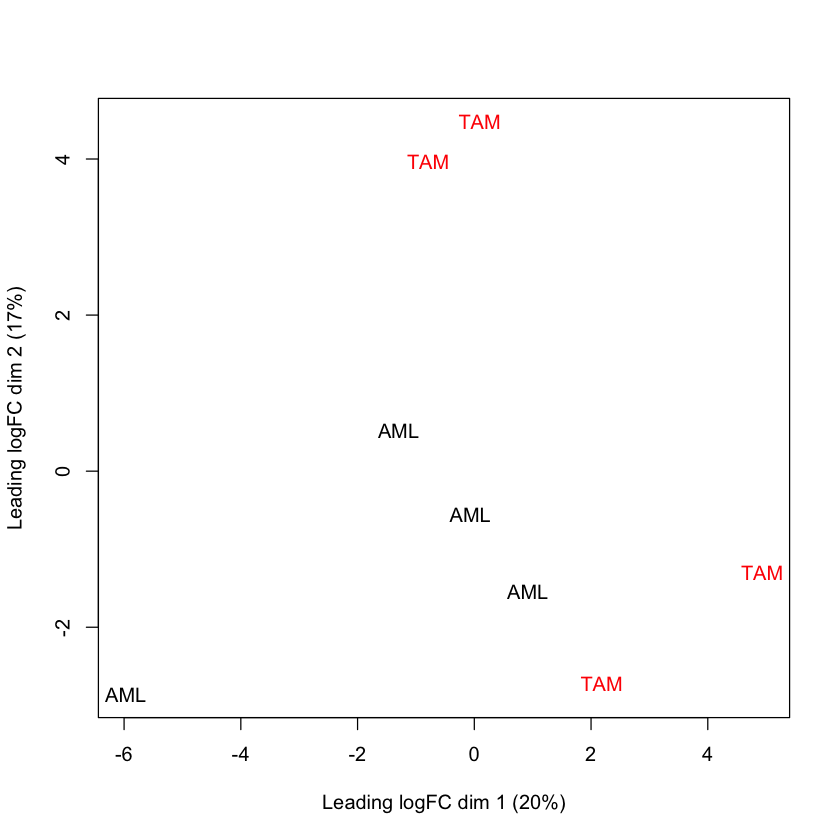

In [42]:
# differential expression:  limma-trend
logCPM <- cpm(dge, log=TRUE, prior.count=3)
plotMDS(logCPM,labels=coldata$condition,top=10, col=c(rep(c("red","black"),3)))

In [43]:
fit <- lmFit(logCPM, design)
fit <- eBayes(fit, trend=TRUE)
de_results <- topTable(fit, coef=ncol(design), n=Inf) 
lookup <- rownames(de_results)

In [44]:
length(featureData[lookup,2])

[1] 2481

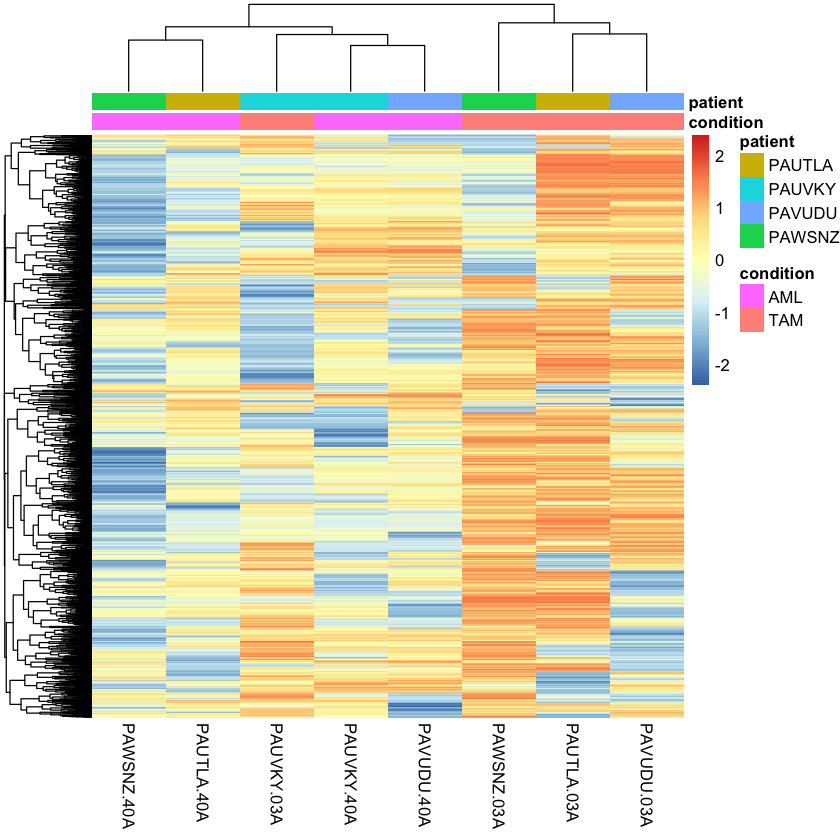

In [45]:
library("pheatmap")
df <- as.data.frame(coldata[,c("condition","patient")])
top_genes_expression <- dge[lookup,]
out <- pheatmap(top_genes_expression, cluster_rows5=TRUE, show_rownames=FALSE,
         cluster_cols=TRUE, annotation_col=df, scale="row",clustering_distance_cols = "minkowski", clustering_distance_rows = "minkowski" )

In [46]:
# Assuming you have the 'de_results' object from topTable
fold_change_threshold <- 8
adjusted_pvalue_threshold <- 0.05

# Select genes that meet both fold change and adjusted p-value criteria
significant_genes <- de_results[
  abs(de_results$logFC) > fold_change_threshold &
  de_results$adj.P.Val < adjusted_pvalue_threshold,
]
dim(significant_genes)

[1] 475   6

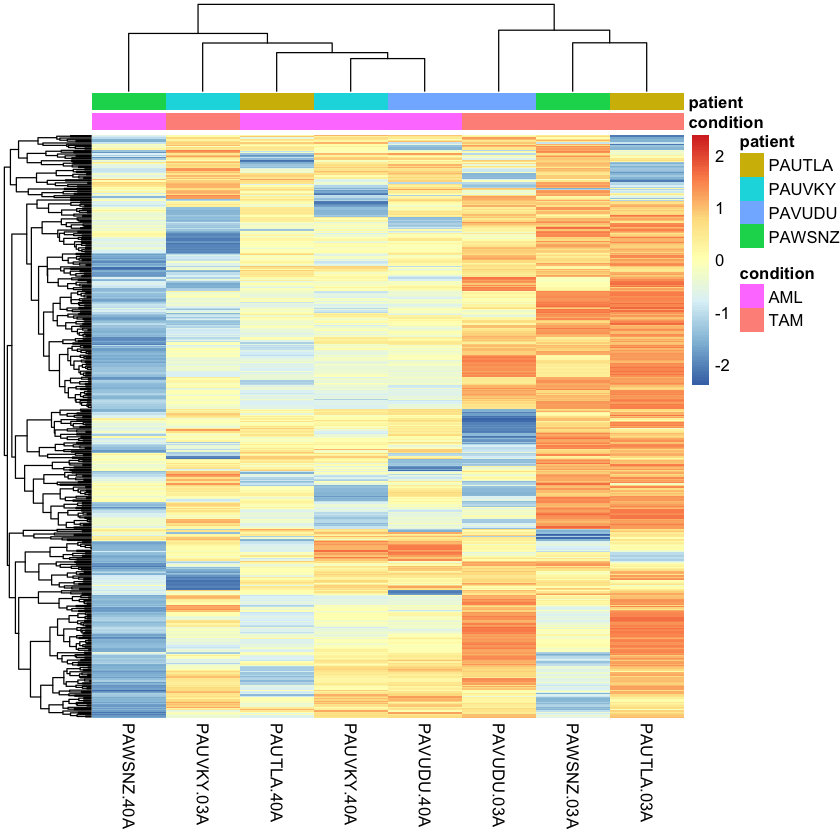

In [47]:
lookup <- rownames(significant_genes)
significant_expression <- dge[lookup,]
significant_out <- pheatmap(significant_expression, cluster_rows5=TRUE, show_rownames=FALSE,
         cluster_cols=TRUE, annotation_col=df, scale="row",clustering_distance_cols = "minkowski", clustering_distance_rows = "minkowski" )

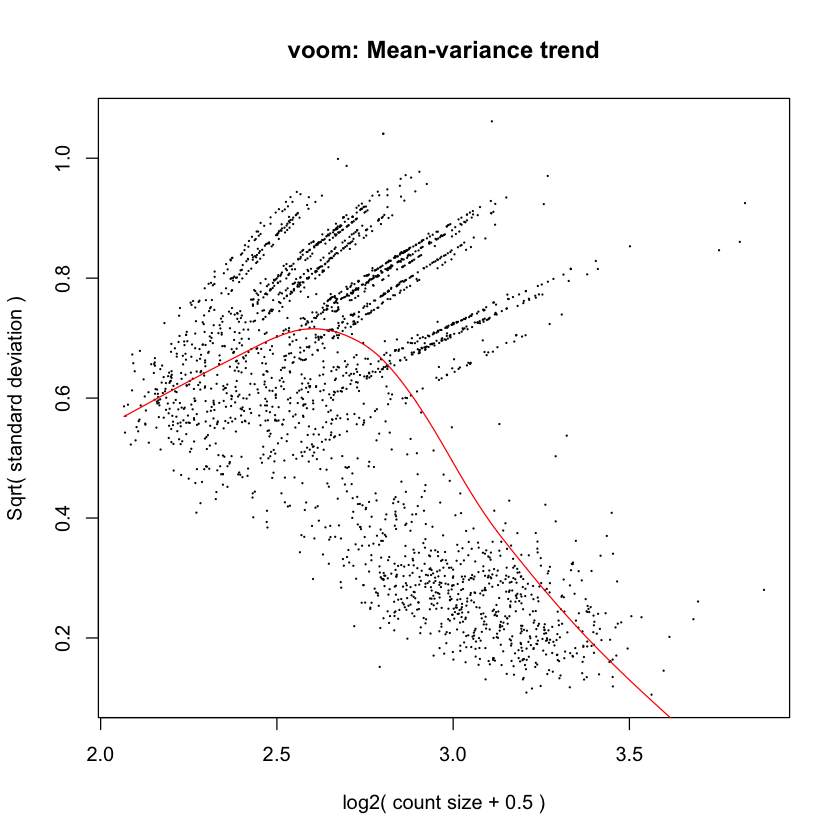

In [48]:
# weighting by genotype (each patient)
v <- voom(logCPM, plot=TRUE, normalize="quantile")


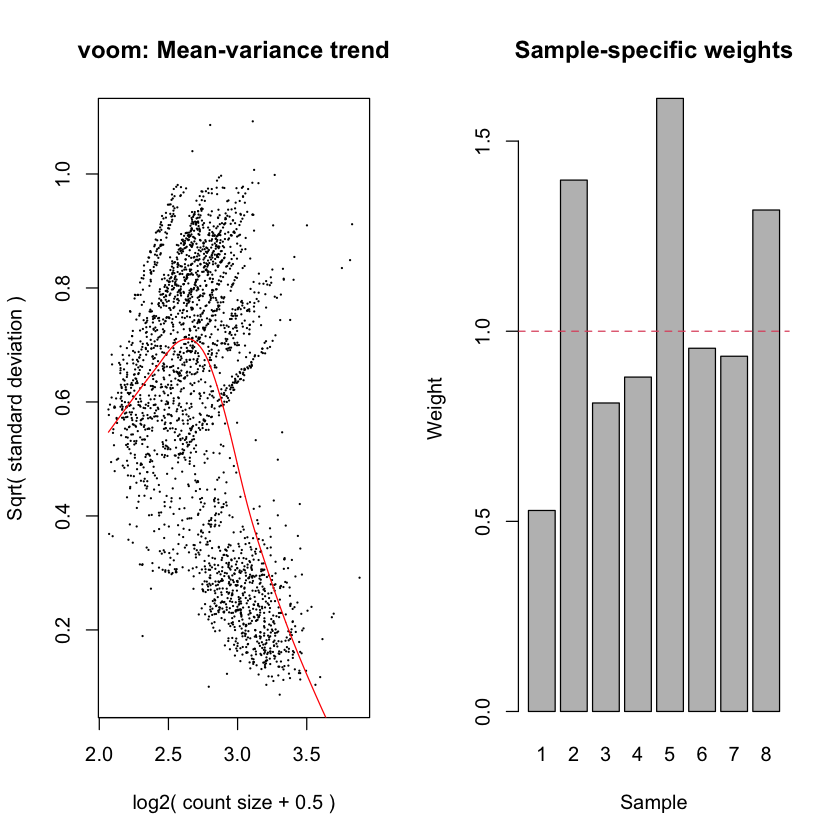

In [49]:
vwts <- voomWithQualityWeights(logCPM, design=design, normalize.method="quantile", plot=TRUE)

In [50]:
vwtsfit <- lmFit(vwts, design, weights = vwts$weights * c(2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0))


In [51]:
summary(vwtsfit)

                 Length Class  Mode     
coefficients     4962   -none- numeric  
stdev.unscaled   4962   -none- numeric  
sigma            2481   -none- numeric  
df.residual      2481   -none- numeric  
cov.coefficients    4   -none- numeric  
pivot               2   -none- numeric  
rank                1   -none- numeric  
Amean            2481   -none- numeric  
method              1   -none- character
design             16   -none- numeric  

In [52]:
vwtsfit <- eBayes (vwtsfit)
vwtsfit <- treat(vwtsfit, lfc=log2(1.2))
topTreat(vwtsfit, coef=ncol(design),sort.by="logFC")

,logFC,AveExpr,t,P.Value,adj.P.Val
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
90350,10.027656,9.725060,36.54795,9.629553e-10,1.485246e-09
90353,9.956715,9.710338,236.37539,9.124109e-16,7.470929e-15
43135,9.876717,9.778917,525.31724,2.399210e-18,7.832159e-17
90352,9.862842,9.651383,103.38515,4.267197e-13,1.382104e-12
65711,9.574664,9.591821,24534.37115,9.139960e-31,2.267624e-27
65712,9.571498,9.578673,362.45175,3.772705e-17,5.742381e-16
61149,9.521360,9.494189,2314.99134,3.858151e-23,3.190691e-20
28807,9.515675,9.301804,3987.03851,6.763490e-25,8.390110e-22
104405,9.493576,9.510632,310.15871,1.200487e-16,1.481796e-15


In [53]:
de_vwts_results <- topTreat(vwtsfit, coef=ncol(design), n=Inf, sort.by="logFC")

In [54]:
sum(de_vwts_results[,"logFC"] >= 1.5)
sum(de_vwts_results[,"logFC"] >= 2.0)
sum(de_vwts_results[,"logFC"] >= 4.0)
sum(de_vwts_results[,"logFC"] >= 8.0)
sum(de_vwts_results[,"logFC"] >= 9.0)

[1] 2481

[1] 2481

[1] 2481

[1] 2417

[1] 445

In [55]:
# Assuming you have the 'de_results' object from topTable
fold_change_threshold <- 9
adjusted_pvalue_threshold <- 0.05

# Select genes that meet both fold change and adjusted p-value criteria
significant_genes <- de_vwts_results[
  abs(de_vwts_results$logFC) > fold_change_threshold &
  de_vwts_results$adj.P.Val < adjusted_pvalue_threshold,
]


In [56]:
dim(significant_genes)

[1] 444   5

In [57]:
transformed_expression <- vwts$E

In [58]:
head(rownames(transformed_expression))
dim(transformed_expression)

[1] "2"   "25"  "65"  "69"  "281" "354"

[1] 2481    8

In [59]:
significant_transformed_expression <- transformed_expression[rownames(significant_genes),]

In [60]:
head(significant_transformed_expression,3)

,PAUVKY.03A,PAUVKY.40A,PAWSNZ.03A,PAWSNZ.40A,PAUTLA.03A,PAUTLA.40A,PAVUDU.03A,PAVUDU.40A
90350,10.027656,10.027656,10.027656,10.027656,10.027656,10.027656,7.606885,10.027656
90353,9.962730,9.962730,9.962730,7.878667,9.962730,9.962730,10.027656,9.962730
43135,9.786838,9.693677,9.724697,9.894945,9.724697,9.724697,9.894945,9.786838


In [61]:
string_gene_list <- as.matrix(featureData[rownames(significant_genes),2])
length(string_gene_list)
#string_gene_list

[1] 444

In [62]:
top_genes_expression <- dge[rownames(significant_genes),]

In [63]:
dim(top_genes_expression)

[1] 444   8

In [64]:
head(top_genes_expression,5)

An object of class "DGEList"
$counts
      PAUVKY.03A PAUVKY.40A PAWSNZ.03A PAWSNZ.40A PAUTLA.03A PAUTLA.40A
90350      58656      51761      87429      35593      92318      47771
90353      43265      32331      69106          0      71056      29207
43135       7890       4308      12374       5306      12111       6218
90352      28650      23611      45376          0      47129      21379
65711       2289       1533       3223       2336       3114       2231
      PAVUDU.03A PAVUDU.40A
90350          0      50837
90353      52638      31043
43135       6709       5785
90352      34495      22992
65711       1986       2521

$samples
           group lib.size norm.factors
PAUVKY.03A     1   430328    0.9925687
PAUVKY.40A     1   390478    1.0621354
PAWSNZ.03A     1   639349    0.8277640
PAWSNZ.40A     1   226249    1.2003933
PAUTLA.03A     1   696504    0.8108995
PAUTLA.40A     1   395779    0.9563207
PAVUDU.03A     1   461053    1.0920133
PAVUDU.40A     1   378224    1.1272777

In [65]:
head(vwts,5)

An object of class "EList"
$E
    PAUVKY.03A PAUVKY.40A PAWSNZ.03A PAWSNZ.40A PAUTLA.03A PAUTLA.40A
2     8.611077   8.532489   7.766759   8.687593   8.332116   7.906814
25    8.701360   8.804826   8.743031   8.819017   8.714216   8.662677
65    7.674706   9.080956   9.002058   7.878667   9.006770   9.080956
69    7.674706   8.999626   8.845553   7.878667   8.833978   8.938195
281   8.730500   8.783397   7.606885   7.878667   8.592793   8.654325
    PAVUDU.03A PAVUDU.40A
2     8.558573   8.554768
25    8.863878   8.823735
65    9.056269   8.971127
69    8.963949   7.663229
281   8.739848   8.871284

$weights
         [,1]      [,2]      [,3]     [,4]      [,5]      [,6]     [,7]
[1,] 3.006669  5.968315  3.781652 4.283204  7.293773  3.802248 4.876440
[2,] 2.877120 10.013618  7.537773 4.498771 16.707428 10.242031 6.235579
[3,] 3.757674 11.287242 11.273997 4.897486 25.576798 11.955297 8.622691
[4,] 2.321064  6.546434  5.144786 4.760394 11.119343  4.010530 4.654403
[5,] 2.332625  5.586496  3.202096 3.465184  6.332561  4.214266 3.859329
         [,8]
[1,] 6.002538
[2,] 7.807421
[3,] 8.647549
[4,] 6.663545
[5,] 5.176920

$design
  AML TAM
1   1   0
2   0   1
3   1   0
4   0   1
5   1   0
6   0   1
7   1   0
8   0   1
attr(,"assign")
[1] 1 1
attr(,"contrasts")
attr(,"contrasts")$`factor(c(1, 2, 1, 2, 1, 2, 1, 2))`
[1] "contr.treatment"


$targets
           lib.size sample.weights
PAUVKY.03A 16301.10      0.5286016
PAUVKY.40A 16633.78      1.3974535
PAWSNZ.03A 17486.63      0.8112819
PAWSNZ.40A 15810.46      0.8793907
PAUTLA.03A 17686.54      1.6123094
PAUTLA.40A 17400.86      0.9552369
PAVUDU.03A 16807.91      0.9342192
PAVUDU.40A 16200.76      1.3187798

In [66]:
library("pheatmap")
df <- as.data.frame(coldata[,c("condition","patient")])

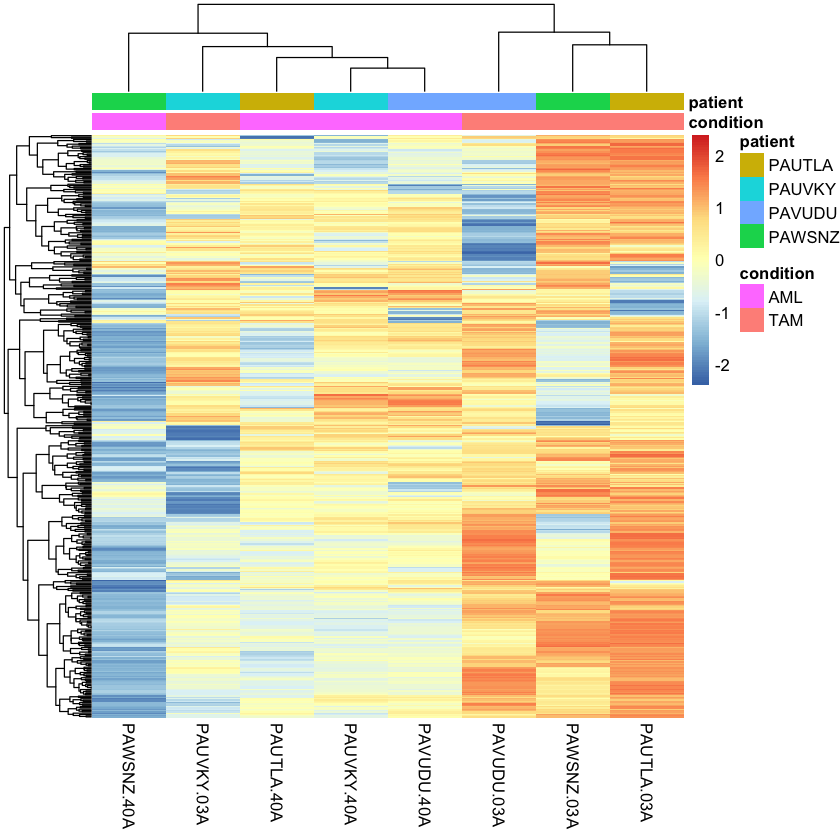

In [67]:
out<-pheatmap(top_genes_expression, cluster_rows5=TRUE, show_rownames=FALSE,
         cluster_cols=TRUE, annotation_col=df, scale="row",clustering_distance_cols = "minkowski", clustering_distance_rows = "minkowski" )

In [68]:
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}
save_pheatmap_pdf(out, "top_genes_expression.pdf")

pdf 
  2

In [69]:
#Re-order original data (genes) to match ordering in heatmap (top-to-bottom)
rn <- rownames(top_genes_expression[out$tree_row[["order"]],])
cn <- colnames(top_genes_expression[,out$tree_col[["order"]]])

In [70]:
#If you want something like gene-to-cluster assignment, you can 'cut' your row dendrogram into a pre-selected number of groups as follows:
#8 groups
clusters<- as.matrix(row_clusters<- sort(cutree(out$tree_row, k=8)),nrows=dim(top_genes_expression)[1],ncols=1)
genes_in_clusters = featureData[rownames(clusters),2]
genes_in_clusters.df <- data.frame(featureData[rownames(clusters),2], clusters)
colnames(genes_in_clusters.df) <- c("geneSymbol","cluster")
dim(genes_in_clusters.df)
cluster_1_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 1,]
cluster_2_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 2,]
cluster_3_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 3,]
cluster_4_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 4,]
cluster_5_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 5,]
cluster_6_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 6,]
cluster_7_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 7,]
cluster_8_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 8,]
write.csv(cluster_1_genes$geneSymbol,"string_list_cluster_1.csv",quote=FALSE,row.names=FALSE)
write.csv(cluster_2_genes$geneSymbol,"string_list_cluster_2.csv",quote=FALSE,row.names=FALSE)
write.csv(cluster_3_genes$geneSymbol,"string_list_cluster_3.csv",quote=FALSE,row.names=FALSE)
write.csv(cluster_4_genes$geneSymbol,"string_list_cluster_4.csv",quote=FALSE,row.names=FALSE)
write.csv(cluster_5_genes$geneSymbol,"string_list_cluster_5.csv",quote=FALSE,row.names=FALSE)
write.csv(cluster_6_genes$geneSymbol,"string_list_cluster_6.csv",quote=FALSE,row.names=FALSE)
write.csv(cluster_7_genes$geneSymbol,"string_list_cluster_7.csv",quote=FALSE,row.names=FALSE)
write.csv(cluster_8_genes$geneSymbol,"string_list_cluster_8.csv",quote=FALSE,row.names=FALSE)

[1] 444   2

In [97]:
#to understand the difference between AML and TAM, we will use contrasts

In [ ]:
fit2 <- eBayes(fit2)

In [ ]:
topTable(fit2, adjust="BH")

In [ ]:
de_results_fit2 <- topTable(fit2, adjust="BH", n=Inf)
dim(de_results_fit2)

In [ ]:
head(de_results_fit2[,c("TAM")])


In [ ]:
de_results_fit2_ratio <- matrix(1.0,
              nrow = dim(de_results_fit2)[1],
              ncol = 1)
dim(de_results_fit2_ratio)
head(de_results_fit2_ratio,3)

In [ ]:
i = 2000

In [ ]:
de_results_fit2[i,c("TAM")] > de_results_fit2[i,c("AML")]

In [ ]:
de_results_fit2_ratio[i] = as.double((de_results_fit2[i,c("TAM")])/(de_results_fit2[i,c("AML")]))


In [ ]:
de_results_fit2_ratio[i]

In [ ]:
for (i in 1:10) {
    if (de_results_fit2[i,c("TAM")] >= de_results_fit2[i,c("AML")] ){
        de_results_fit2_ratio[i] = as.double((de_results_fit2[i,c("TAM")])/(de_results_fit2[i,c("AML")]))
    } else {
        de_results_fit2_ratio[i] = as.double((de_results_fit2[i,c("AML")])/(de_results_fit2[i,c("TAM")]))
    }
}


In [ ]:
head (de_results_fit2_ratio)

In [ ]:
results2 <- decideTests(fit2)

In [ ]:
contrasts_fit_venn_counts <- vennCounts(results2)

In [ ]:
contrasts_fit_venn_counts

In [ ]:
head(results2)

In [ ]:
head(de_results2)

In [ ]:
filtered_de_results2 <- de_results2[c((abs(de_results2[,c("AMLvsTAM")]) > 1.5) |
                        (abs(de_results2[,c("TAMvsAML")]) > 1.5)),]

In [ ]:
filtered_de_results2